## Задания для работы с курсовым проектом

Скачать данные из соревнования, пока можете работать только с **train.csv**. Считать их.

## Задание 1
    Построить график распределения целевой переменной. Сделать выводы.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


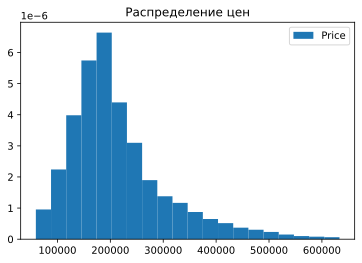

In [3]:
plt.hist(df['Price'], bins=20, density=True, label='Price')
plt.title('Распределение цен')
plt.legend()
plt.show()

С ростом цены количество предложений снижается.
<br>Основная масса цен между 100 и 300 тысячами.

## Задание 2
    Построить гистограммы для наиболее проблемных признаков (используйте выводы из первого ДЗ). Сделайте по ним выводы.

По прошлому заданию помним, что в LifeSquare и Healthcare_1 были значения NaN.

#### LifeSquare

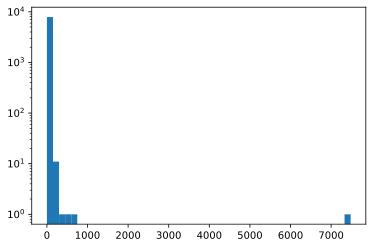

In [4]:
plt.hist(df['LifeSquare'], bins=50)
plt.yscale('log')
plt.show()

Очевидно выброс после 7000 - мешает нормально рассмотреть распределение.

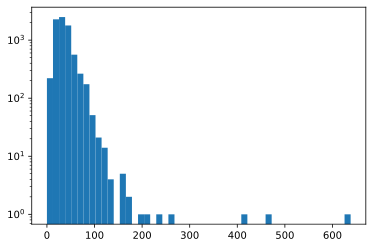

In [5]:
df.loc[df.LifeSquare > 7000, 'LifeSquare'] = 0
plt.hist(df['LifeSquare'], bins=50)
plt.yscale('log')
plt.show()

Видим большое количество значений равных или близких к 0.
<br>А также пропуски в значениях между 200 и 600.

Меняем значения NaN на нули.

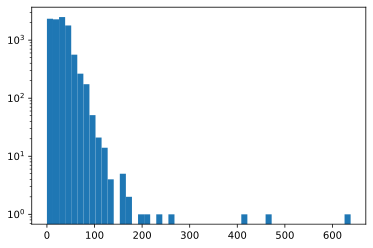

In [6]:
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = 0
plt.hist(df['LifeSquare'], bins=50)
plt.yscale('log')
plt.show()

Нулевых значений очень много, необходимо их заменить на что-то адекватное.

#### HealthCare_1

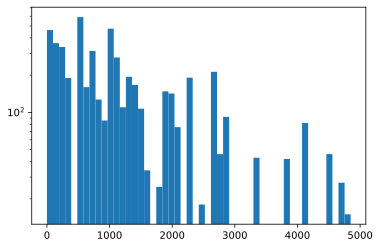

In [7]:
plt.hist(df['Healthcare_1'], bins=50)
plt.yscale('log')
plt.show()

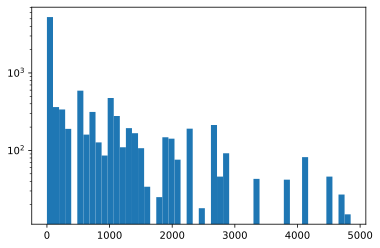

In [8]:
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = 0
plt.hist(df['Healthcare_1'], bins=50)
plt.yscale('log')
plt.show()

Опять же нужно чем-то заменить нулевые значения.

#### HouseYear

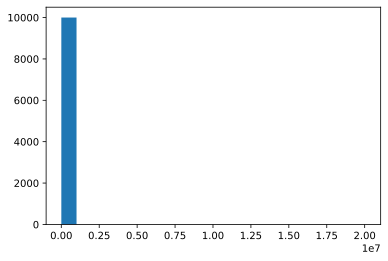

In [12]:
plt.hist(df['HouseYear'], bins=20)
plt.show()

Не получается построить гистограмму, возможно из-за слишком больших выбросов.

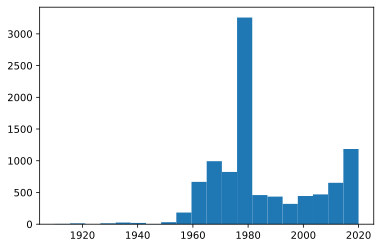

In [13]:
plt.hist(df['HouseYear'][df['HouseYear'] <= 2020], bins=20)
plt.show()

В остальном всё выглядит нормально.

#### Rooms

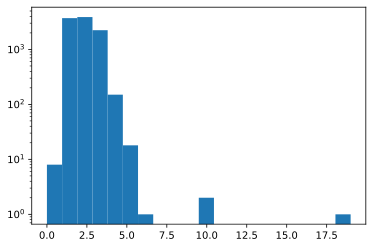

In [21]:
plt.hist(df['Rooms'], bins=20)
plt.yscale('log')
plt.show()

Видно пару выбросов и нулевые значения.

#### KitchenSquare

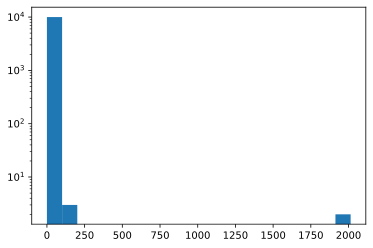

In [22]:
plt.hist(df['KitchenSquare'], bins=20)
plt.yscale('log')
plt.show()

Снова ничего не видно из-за выброса.

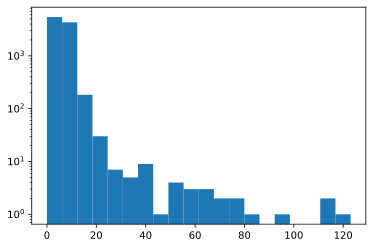

In [25]:
plt.hist(df['KitchenSquare'][df['KitchenSquare'] < 300], bins=20)
plt.yscale('log')
plt.show()

Много нулей, в остальном выглядит нормально.

#### Floors

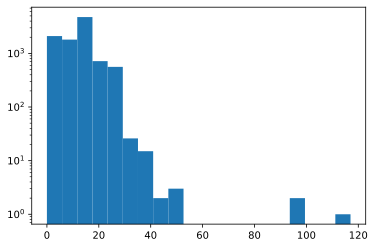

In [31]:
plt.hist(df['HouseFloor'], bins=20)
plt.yscale('log')
plt.show()

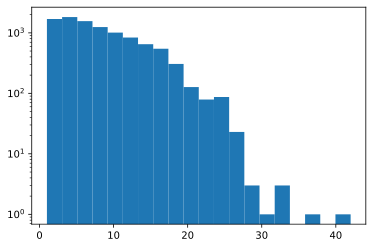

In [32]:
plt.hist(df['Floor'], bins=20)
plt.yscale('log')
plt.show()

## Задание 3
3. Построить матрицу корреляций признаков и целевой переменной. Сделайте выводы.

In [33]:
# Чтобы видеть признаки
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,0.000000,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,0.0,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,0.000000,1.0,10,22.0,1977,0.007122,B,B,1,264,0,0.0,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,0.0,0,6,B,343995.102962


In [39]:
pd.pivot_table(df,
              values='Price',
              index='Rooms',
              columns='Floor',
              aggfunc='median')

Floor,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,31,32,33,37,42
Rooms,,,,,,,,,,,,,,,,,,,,,
0.0,126596.941798,302211.260887,NaN,240629.771750,219281.918007,NaN,NaN,NaN,158998.110646,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,144718.362373,154431.437589,151028.428278,151234.765129,155481.052718,154170.219034,152956.829998,159265.624056,162983.293952,159142.182794,...,175042.816715,151846.935899,248694.198688,171555.492735,299467.423695,117647.461002,245640.188762,389554.06354,269113.584248,NaN
2.0,182657.618386,188350.645702,188075.868104,198274.384595,196727.460606,199868.127389,201485.941300,211768.371011,204126.847689,207287.918060,...,287251.577620,218538.048237,244220.621495,168381.124180,333862.631152,NaN,NaN,NaN,NaN,411691.504766
3.0,216635.945230,248218.683158,249114.537525,253972.155369,264709.549033,283261.575797,272724.581327,275644.708378,270812.335389,254692.419760,...,342909.172902,363993.218432,435676.584580,339636.013693,NaN,NaN,NaN,NaN,NaN,NaN
4.0,286261.566899,429322.285504,396467.592606,346949.506507,318774.759823,437706.650752,389682.337250,405223.425196,347786.543852,322803.914347,...,363104.598987,415453.727512,406384.445205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,317674.574137,622888.825328,310305.074733,466756.262983,206148.845716,499830.937577,479525.147323,NaN,NaN,NaN,...,NaN,455446.393758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,229661.964416,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,NaN,NaN,172329.270863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Чем больше комнат, тем дороже квартира.
<br>В среднем, верхние этажи дороже нижних.

In [74]:
pd.pivot_table(df,
              values='Price',
              index='Rooms',
              columns='KitchenSquare',
              aggfunc='median')

KitchenSquare,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,72.0,73.0,75.0,78.0,84.0,96.0,112.0,123.0,1970.0,2014.0
Rooms,,,,,,,,,,,,,,,,,,,,,
0.0,217009.338463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158998.110646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.0,128512.648116,133072.279471,122959.452661,124258.914679,181495.792355,154167.817792,159317.369003,171483.855417,177158.782981,173377.872562,...,NaN,160488.033165,NaN,NaN,99079.960518,NaN,NaN,NaN,105539.556275,108337.484207
2.0,180286.268974,183676.719710,211149.766549,197245.267664,198763.318546,191452.132678,201428.740006,212840.343504,239002.255285,239606.501593,...,NaN,NaN,NaN,438708.707579,NaN,NaN,NaN,NaN,NaN,NaN
3.0,217304.111077,223806.974242,NaN,341175.165160,321403.484832,238371.290400,235764.477795,303386.465549,311327.406331,311734.842579,...,370148.625285,NaN,290354.48407,NaN,NaN,445074.956552,305705.728874,234194.837047,NaN,NaN
4.0,352426.839444,347736.968943,NaN,NaN,465934.434276,296071.371243,294405.899542,351988.269722,358530.396811,436302.576234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,232431.298872,330797.619737,NaN,NaN,NaN,375681.338801,NaN,479525.147323,310305.074733,513239.499082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,229661.964416,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78364.616704,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В целом видна зависимость от размера кухни, и количества комнат. Чем больше площадь кухни и комнат в квартире - тем дороже, хотя не всегда.

In [48]:
pd.pivot_table(df,
              values='Price',
              index='Rooms',
              columns='HouseYear',
              aggfunc='median')

HouseYear,1910,1912,1914,1916,1917,1918,1919,1928,1929,1930,...,2013,2014,2015,2016,2017,2018,2019,2020,4968,20052011
Rooms,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,217009.338463,268394.744389,NaN,NaN,NaN,NaN,NaN,NaN
1.0,287954.720682,262279.813915,NaN,NaN,236830.764637,NaN,321506.277104,NaN,NaN,197433.228221,...,124426.090212,127196.762031,134683.995005,134637.737518,139430.545313,143778.292734,132203.174887,157019.932433,NaN,254084.534396
2.0,NaN,NaN,423580.477982,NaN,69623.753191,443270.817520,90314.532343,NaN,NaN,NaN,...,176184.989374,174720.481059,184050.456761,182061.742866,194147.467182,201101.746963,200022.689882,266202.142371,243028.603096,NaN
3.0,NaN,NaN,NaN,284608.939261,486057.129888,540638.323555,524781.018392,324303.812481,288889.078292,390114.596827,...,197696.483475,212018.815190,233100.768702,232694.103403,231464.510346,240748.581768,280442.953786,268773.551406,NaN,NaN
4.0,NaN,284884.959104,NaN,NaN,NaN,376419.535842,NaN,NaN,NaN,NaN,...,442302.089485,213404.653682,280823.647773,307892.969876,228989.865691,389670.030692,410685.266698,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,271919.866048,NaN,NaN,NaN,NaN,NaN
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,78364.616704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Как правило - чем новее дом, тем выше стоимость. Хотя у **очень** старых домов цена заметно выше, чем у новых.